Tenure: Period from the date of disbursement of loan to the date of the last EMI payment or the date of closure of loan.

In [12]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [13]:
# read file into dataframe:
location = "datasets/credit_card.csv"
df  = pd.read_csv(location)
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
# the purpose of this analysis is to check if customer's spending depends on credit card limit and tenure.
# Tenure: period from the date of disbursement of loan to the date of the last EMI (equated monthly installments) payment or the date of closure of loan.
# create new dataframe:

data = df[['CREDIT_LIMIT','TENURE','PURCHASES_TRX']]
data.head()

,CREDIT_LIMIT,TENURE,PURCHASES_TRX
0,1000.0,12,2
1,7000.0,12,0
2,7500.0,12,12
3,7500.0,12,1
4,1200.0,12,1


In [16]:
# rename columns headers:
colheader = {'CREDIT_LIMIT':'Credit Limit',
            "TENURE": "Tenure",
            "PURCHASES_TRX":"No.Purchases"}
data.rename(columns = colheader, inplace = True)
data.head()

C:\Users\thuyq\Anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Credit Limit,Tenure,No.Purchases
0,1000.0,12,2
1,7000.0,12,0
2,7500.0,12,12
3,7500.0,12,1
4,1200.0,12,1


In [17]:
# checking if any missing value:
data.count()

Credit Limit    8949
Tenure          8950
No.Purchases    8950
dtype: int64

In [20]:
# remove missing value:
data = data.dropna()

In [21]:
data.count()

Credit Limit    8949
Tenure          8949
No.Purchases    8949
dtype: int64

In [22]:
# overall descriptive statistics:
data.describe()

,Credit Limit,Tenure,No.Purchases
count,8949.000000,8949.000000,8949.000000
mean,4494.449450,11.517935,14.711476
std,3638.815725,1.337134,24.858552
min,50.000000,6.000000,0.000000
25%,1600.000000,12.000000,1.000000
50%,3000.000000,12.000000,7.000000
75%,6500.000000,12.000000,17.000000
max,30000.000000,12.000000,358.000000


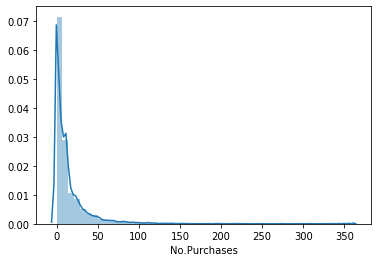

In [23]:
# distribution of number of purchase:
sns.distplot(data['No.Purchases'])

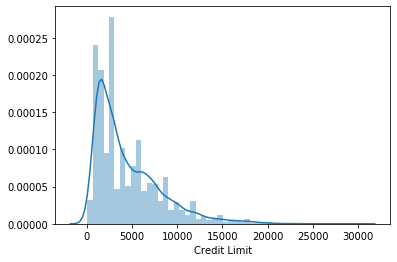

In [24]:
# distribution of Credit Limit:
sns.distplot(data['Credit Limit'])

C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


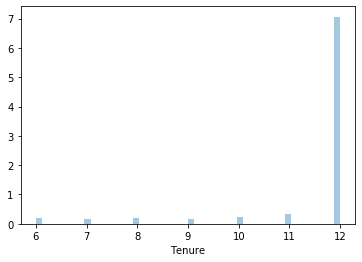

In [26]:
# distribution of Tenure:
sns.distplot(data['Tenure'])

In [27]:
# function to assign credit limit group:
def credit_group (credit):
    if credit <= 1000:
        group = "0-1000"
    elif credit <= 10000:
        group = "1000-10000"
    elif credit <= 20000:
        group = "10000-20000"
    elif credit >= 20000:
        group = "20000+"
    return group

In [28]:
# use function on Credit Limit column:
data['Credit Group'] = data['Credit Limit'].apply(credit_group)

In [29]:
# function to assign Tenure group:
def tenure_group (tenure):
    if tenure <=6:
        group = '6 months'
    elif tenure <=9:
        group = "9 months"
    elif tenure <=12:
        group = "12 months"
    return group

In [30]:
# use function on Tenures column:
data['Tenure Group'] = data['Tenure'].apply(tenure_group)

In [31]:
# verify changes to dataframe:
data.head()

,Credit Limit,Tenure,No.Purchases,Credit Group,Tenure Group
0,1000.0,12,2,0-1000,12 months
1,7000.0,12,0,1000-10000,12 months
2,7500.0,12,12,1000-10000,12 months
3,7500.0,12,1,1000-10000,12 months
4,1200.0,12,1,1000-10000,12 months


In [34]:
# mean average number of purchase by credit group:
data.groupby(['Credit Group'])['No.Purchases'].mean()

Credit Group
0-1000          9.374248
1000-10000     13.788454
10000-20000    31.031157
20000+         37.384615
Name: No.Purchases, dtype: float64

In [35]:
# mean average number of purchase by Tenure Group:
data.groupby(['Tenure Group'])['No.Purchases'].mean()

Tenure Group
12 months    15.521075
6 months      5.719212
9 months      6.153298
Name: No.Purchases, dtype: float64

In [38]:
# mean average number of purchase by credit and tenure group:
data.groupby(['Credit Group','Tenure Group'])['No.Purchases'].mean()

Credit Group  Tenure Group
0-1000        12 months        9.857143
              6 months         5.404762
              9 months         7.909091
1000-10000    12 months       14.503877
              6 months         5.258065
              9 months         5.698413
10000-20000   12 months       31.500000
              6 months        19.833333
              9 months         6.900000
20000+        12 months       37.384615
Name: No.Purchases, dtype: float64

Clients with high credit limit and long term loan tend to spend more. However, for those have limit in 10000-2000 group, they use more money for contract of 6 months than 9 months.  

C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


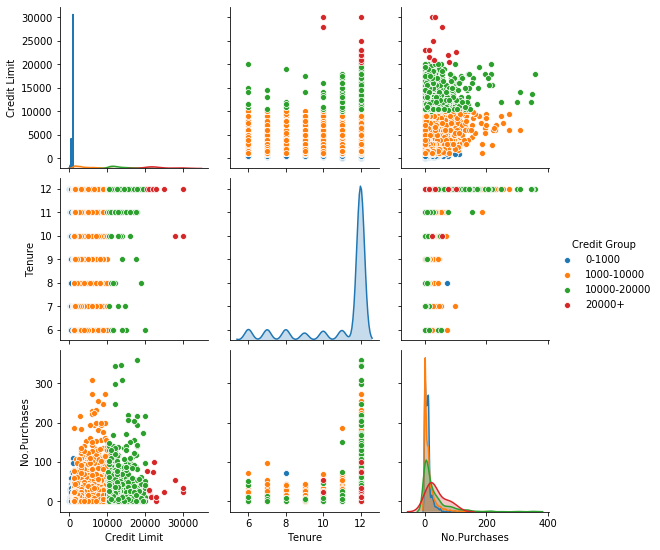

In [39]:
# compare all features by credit group:
sns.pairplot(data, hue = "Credit Group")

# K means model

In [40]:
# dataframe that will be used in algorithm:
X = data[['Credit Limit','Tenure',"No.Purchases"]]
X.head()

,Credit Limit,Tenure,No.Purchases
0,1000.0,12,2
1,7000.0,12,0
2,7500.0,12,12
3,7500.0,12,1
4,1200.0,12,1


In [41]:
# initialize KMeans to create 4 clusters:
kmeans = KMeans(n_clusters=4)

In [42]:
#build the model
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
# create column in original dataframe with cluster group number
data['Cluster'] = kmeans.labels_
data.head()

,Credit Limit,Tenure,No.Purchases,Credit Group,Tenure Group,Cluster
0,1000.0,12,2,0-1000,12 months,0
1,7000.0,12,0,1000-10000,12 months,1
2,7500.0,12,12,1000-10000,12 months,1
3,7500.0,12,1,1000-10000,12 months,1
4,1200.0,12,1,1000-10000,12 months,0


C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\thuyq\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


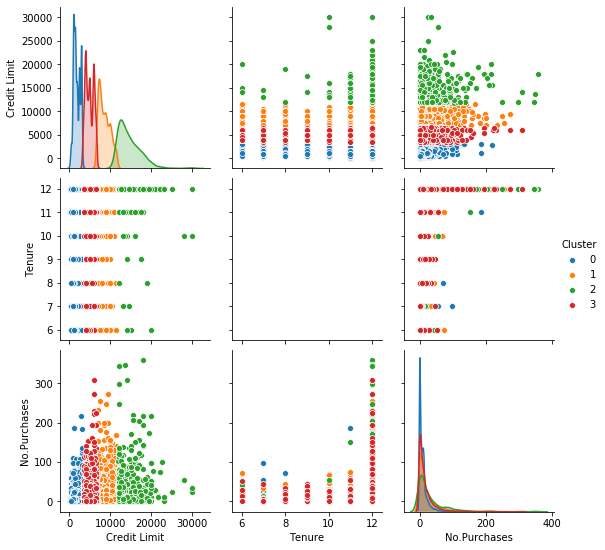

In [44]:
# compare all features by cluster group
sns.pairplot(data, hue="Cluster")

In [45]:
# centriod columns are in order of dataframe columns index
kmeans.cluster_centers_

array([[1.85582129e+03, 1.13182309e+01, 9.47292341e+00],
       [8.61356666e+03, 1.17099042e+01, 2.18306709e+01],
       [1.47001085e+04, 1.18416486e+01, 3.38785249e+01],
       [4.96595920e+03, 1.17259615e+01, 1.65922203e+01]])

In [57]:
kmeans.cluster_centers_[:,0]

array([ 1855.82128731,  8613.56665699, 14700.10845987,  4965.95919863])

# Cluster Analysis

Text(0.5, 1.0, 'Credit Limit and no. of Purchases group')

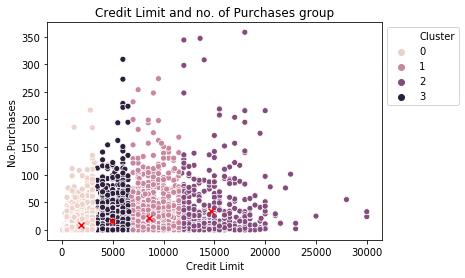

In [58]:
# compare "Credit limit" and "No.Purchases"
sns.scatterplot(data = data, x = "Credit Limit", y = "No.Purchases", hue = "Cluster")

# scatterplot of centroid coordinates for Credit limit and no. of purchase:
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c = "red", marker = 'x')

# put the legend on the right:
plt.legend(bbox_to_anchor=(1,1), loc=2)

plt.title("Credit Limit and no. of Purchases group")

In [67]:
# select a cluster from dataframe:
cluster = data.loc[data['Cluster']==3]
cluster.head()

,Credit Limit,Tenure,No.Purchases,Credit Group,Tenure Group,Cluster
19,4000.0,12,12,1000-10000,12 months,3
24,6000.0,11,0,1000-10000,12 months,3
31,6000.0,12,45,1000-10000,12 months,3
37,5000.0,12,41,1000-10000,12 months,3
42,4500.0,12,1,1000-10000,12 months,3


In [68]:
len(cluster)

2288

In [69]:
cluster.describe()

,Credit Limit,Tenure,No.Purchases,Cluster
count,2288.000000,2288.000000,2288.000000,2288.0
mean,4965.959199,11.725962,16.592220,3.0
std,962.752109,0.998726,24.958703,0.0
min,3500.000000,6.000000,0.000000,3.0
25%,4000.000000,12.000000,1.000000,3.0
50%,5000.000000,12.000000,9.000000,3.0
75%,6000.000000,12.000000,22.000000,3.0
max,6750.000000,12.000000,309.000000,3.0


# Analysis credit limit of cluster

In [75]:
# sort the cluster numbers from min (0) to max(3):
sorted_clusters = sorted(data['Cluster'].unique())

print("Cluster Credit Limit Range\n")
for cluster_num in sorted_clusters:
    small_data = data.loc[data['Cluster']==cluster_num]
    min_credit = small_data['Credit Limit'].min()
    max_credit = small_data['Credit Limit'].max()
    avg_purchase = small_data['No.Purchases'].mean()
    
    print(f"Cluster {cluster_num}: {min_credit}-{max_credit}, avg no. of purchase: {int(avg_purchase)}")

Cluster Credit Limit Range

Cluster 0: 50.0-3400.0, avg no. of purchase: 9
Cluster 1: 6800.0-11500.0, avg no. of purchase: 21
Cluster 2: 11800.0-30000.0, avg no. of purchase: 33
Cluster 3: 3500.0-6750.0, avg no. of purchase: 16


Conclusion: credit limit should be in range of 12,000 to 30,000 to motivate customer spend more money.